In [214]:
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

In [215]:
def plotAudio3(sig,sampleRate,title):
    
    # this version expects the audio file to have already been opened by librosa
    
    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Plot the signal using the x and y axis variables    
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [216]:
def subplots(plotPos,title,data,color,ylabel,xlabel):
    plt.subplot(plotPos[0],plotPos[1],plotPos[2])
    plt.title(title)
    plt.plot(data,color)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [217]:
def makeEchoes(sig,sr,sec,echoes):

    #calculate the number of bytes which corresponds to the offset in milliseconds
    offset=np.int(sr*sec)
    
    #add extra space at the end for the delays
    ending = np.zeros((offset*(len(echoes))))
    
    delayedSig = np.concatenate((sig,ending))
    
    for i in range(len(echoes)):
        
        #create some silence
        # python indexes starting with zero which is why you need to add one
        beginning = np.zeros(offset*(i+1))
        
        #create delayed version of signal
        delay = np.concatenate((beginning,sig))
        delay = delay * echoes[i]

        #pad the end of delay with zeros to make it the same length as delaysedSig
        delay = np.concatenate((delay,np.zeros((delayedSig.size-delay.size))))
        
        # combine with output signal
        delayedSig = delayedSig + delay
    
    return delayedSig

In [218]:
def amplitudeModulation(carrier,modulatorFreq,modulatorAmp,modIndex):
    timeSeries = np.linspace(0, 1, len(carrier))
    modulator = modulatorAmp * np.cos (2 * np.pi * modulatorFreq * timeSeries)
    product = (1 + modIndex * modulator) * carrier
    
    subplots([3,1,1],'Amplitude Modulation',modulator,'g','Amplitude','Modulator signal')
    subplots([3,1,2],'Amplitude Modulation',carrier,'r','Amplitude','Carrier signal')
    subplots([3,1,3],'Amplitude Modulation',product,'purple','Amplitude','AM signal')
    
    plt.subplots_adjust(hspace=1)
    plt.rc('font', size=15)
    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    
    return product

In [219]:
def echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex):
    echoSig = makeEchoes(sig,sr,delay,echoes)
    modSignal=amplitudeModulation(echoSig,modulatorFreq,modulatorAmp,modIndex)
    
    plotAudio3(sig,sr,'Original Signal')
    plotAudio3(modSignal,sr,'Delayed Signal')
    
    return modSignal

In [220]:
sig , sr = librosa.load('avm.wav')
IPython.display.Audio(data=sig, rate=sr)

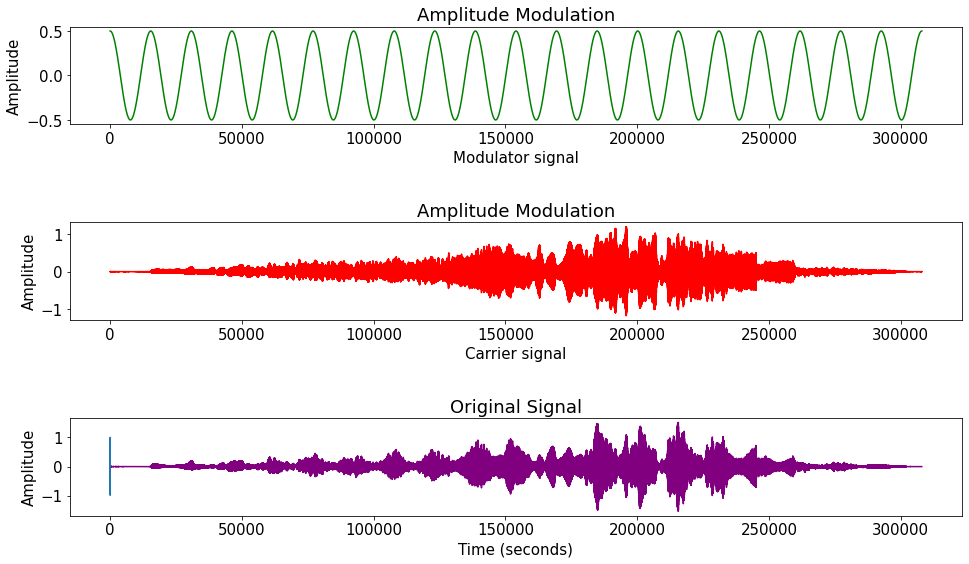

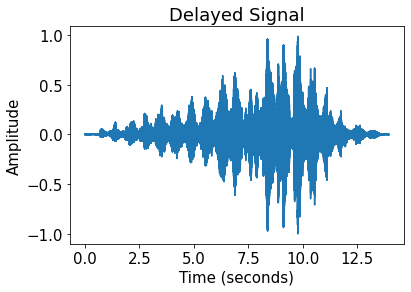

In [221]:
modSignal1 = echoAM(sig,sr,0.5,[1,1,1],20,0.5,1)
IPython.display.Audio(data=modSignal1,rate=sr)

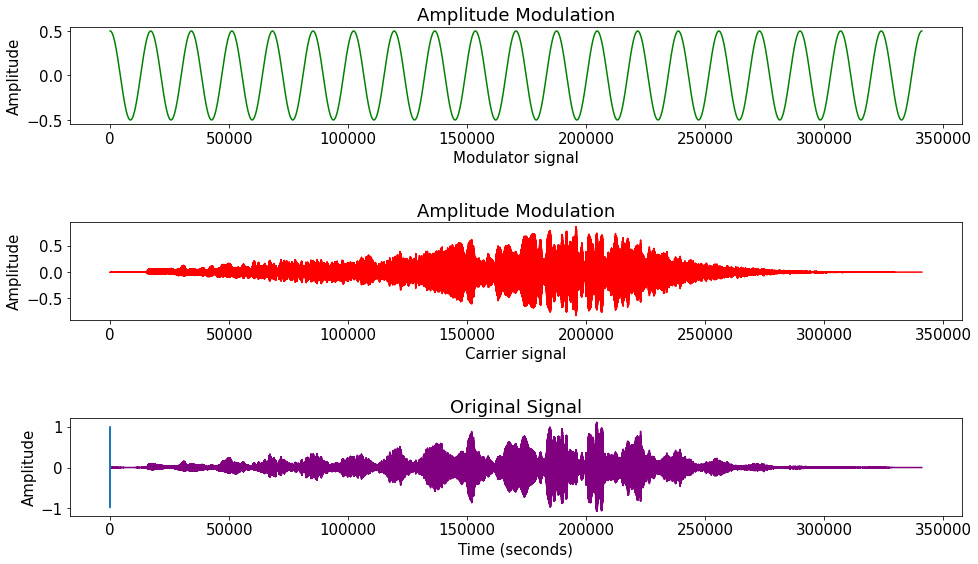

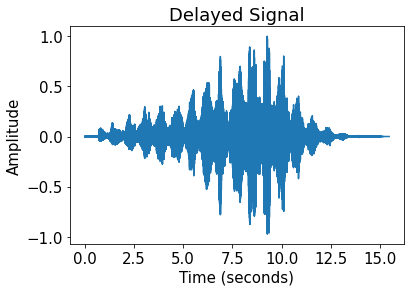

In [222]:
modSignal2 = echoAM(sig,sr,0.5,[1,0.5,0.25,0.125,0.0625,0.03125],20,0.5,1) 
IPython.display.Audio(data=modSignal2,rate=sr)

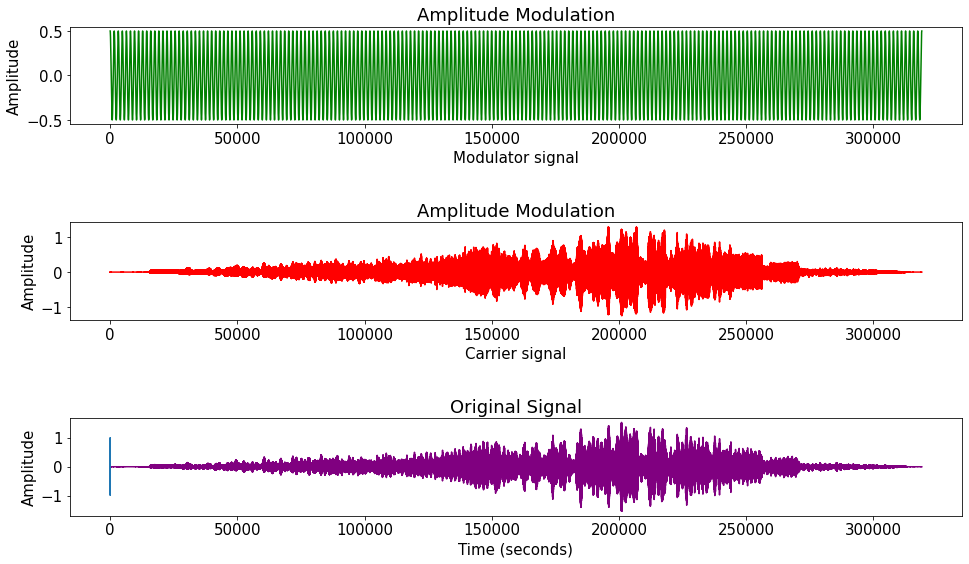

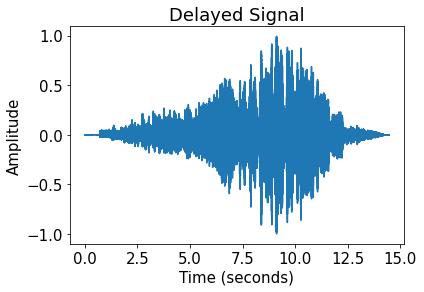

In [223]:
modSignal3 = echoAM(sig,sr,0.5,[1,1,1,1],200,0.5,0.5) 
IPython.display.Audio(data=modSignal3,rate=sr)